# NOMBRE: Belter Molina Guevara
#CARNET: 21002925

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
import os

In [48]:
warnings.filterwarnings('ignore') 
%config IPCompleter.greedy = True 
pd.options.display.max_rows = None 
pd.options.display.max_columns = None 
pd.options.display.precision = 2 

In [49]:
# Cargamos nuestro Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Live.csv', encoding='utf-8')
df.drop_duplicates(inplace=True)
df.shape

(6999, 16)

In [50]:
#Preparacion de los datos
miss_val = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
miss_val[miss_val>0]

Column1    100.0
Column2    100.0
Column3    100.0
Column4    100.0
dtype: float64

In [51]:
# eliminado la columnas con valores nulos
df.drop(labels=['Column1', 'Column2', 'Column3','Column4'], axis=1, inplace=True)

In [52]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [53]:
df.drop('status_id', axis=1, inplace=True)

In [54]:
# convertimos status_type en categorica

df['status_type_isvideo'] = df['status_type'].map(lambda x:1 if(x=='video') else 0)
df.drop('status_type', axis=1, inplace=True)

In [55]:
#convertimos satatus_plubished a tipo de dato string.

df['status_published'] = pd.to_datetime(df['status_published'])

In [56]:
df['year'] = df['status_published'].dt.year
df['month'] = df['status_published'].dt.month
df['dayofweek'] = df['status_published'].dt.dayofweek # 0 is Monday, 7 is Sunday.
df['hour'] = df['status_published'].dt.hour

In [57]:
reaction = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
            'num_sads', 'num_angrys']

In [58]:
before2016 = df[df['year']<=2015]
after2016 = df[df['year']>2015]

In [59]:
# comparamos antes del facebook live

before2016[reaction].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,1659.00,1659.00,1659.00,1659.00,1659.0,1659.0,1659.0,1659.0,1659.0
mean,433.14,13.90,2.65,433.14,0.0,0.0,0.0,0.0,0.0
std,733.35,37.18,11.80,733.35,0.0,0.0,0.0,0.0,0.0
min,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
25%,20.50,2.00,0.00,20.50,0.0,0.0,0.0,0.0,0.0
50%,51.00,6.00,0.00,51.00,0.0,0.0,0.0,0.0,0.0
75%,440.00,13.00,1.00,440.00,0.0,0.0,0.0,0.0,0.0
max,4710.00,509.00,122.00,4710.00,0.0,0.0,0.0,0.0,0.0


In [60]:
after2016[reaction].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,5340.00,5340.00,5340.00,5340.00,5340.00,5340.00,5340.00,5340.00,5340.00
mean,160.33,291.31,51.94,140.61,16.71,1.64,0.91,0.30,0.14
std,290.13,1012.90,149.11,256.79,45.19,9.96,4.52,1.69,0.79
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15.00,0.00,0.00,15.00,0.00,0.00,0.00,0.00,0.00
50%,61.00,3.00,0.00,58.00,1.00,0.00,0.00,0.00,0.00
75%,199.00,51.00,9.25,165.00,7.00,1.00,0.00,0.00,0.00
max,4410.00,20990.00,3424.00,4315.00,657.00,278.00,157.00,51.00,31.00


In [61]:
# Vamos a analizar los datos depues del 2016. vamos a visualizar los datos utilizando PCA.

before2016.groupby('status_type_isvideo')[reaction].mean()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type_isvideo,,,,,,,,,
0,364.45,12.44,1.87,364.45,0.0,0.0,0.0,0.0,0.0
1,696.70,19.49,5.66,696.70,0.0,0.0,0.0,0.0,0.0


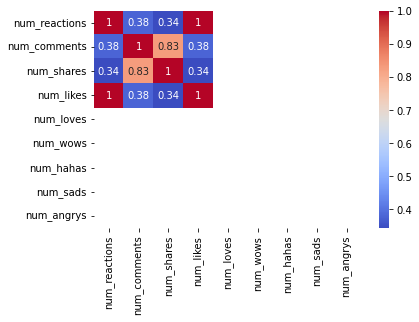

In [62]:
# en la  vamos que Shares y Comments tiene una buena correlacion
sns.heatmap(before2016[reaction].corr(), cmap='coolwarm', annot=True)

In [63]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
before2016_s = before2016[reaction]
before2016_s = standard_scaler.fit_transform(before2016_s) 

In [64]:
# tratando de mejorar el modulo PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=123)

In [65]:
# Hacemos PCA en los datos
pca.fit(before2016_s)


PCA(random_state=123, svd_solver='randomized')

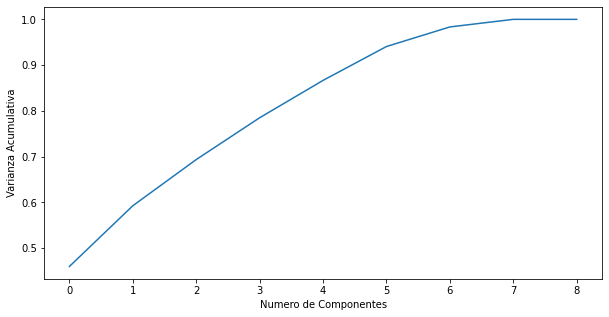

In [96]:
#Trazando la varianza acumulada contra el numero de componentes

fig = plt.figure(figsize = (10,5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de Componentes')
plt.ylabel('Varianza Acumulativa')

plt.show()

In [67]:
# ¿Qué porcentaje de variación en los datos puede ser explicado por los primeros 2, 3 y 4 componentes principales respectivamente?
(pca.explained_variance_ratio_[0:2].sum().round(3),
pca.explained_variance_ratio_[0:3].sum().round(3),
pca.explained_variance_ratio_[0:4].sum().round(3))
(pca.explained_variance_ratio_[0:2].sum().round(3),
pca.explained_variance_ratio_[0:3].sum().round(3),
pca.explained_variance_ratio_[0:4].sum().round(3))

(0.958, 1.0, 1.0)

In [68]:

#vamos a usa los primeros 2 componentes principales para visualizar la importancia de las funciones.
loadings = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':reaction})
loadings

,PC1,PC2,Feature
0,0.53,-0.47,num_reactions
1,0.48,0.51,num_comments
2,0.46,0.55,num_shares
3,0.53,-0.47,num_likes
4,-0.00,0.00,num_loves
5,-0.00,0.00,num_wows
6,-0.00,0.00,num_hahas
7,-0.00,0.00,num_sads
8,-0.00,0.00,num_angrys


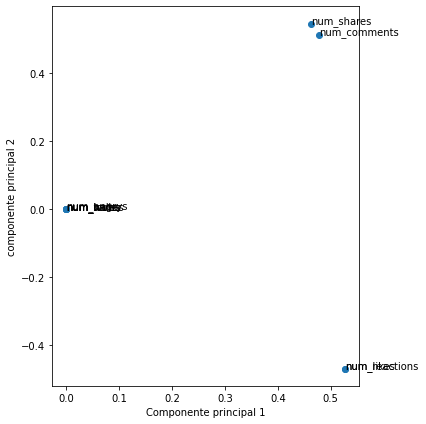

In [69]:
# Visualizamos los componentes principales
fig = plt.figure(figsize = (6,6))
plt.scatter(loadings.PC1, loadings.PC2)
plt.xlabel('Componente principal 1')
plt.ylabel('componente principal 2')
for i, txt in enumerate(loadings.Feature):
    plt.annotate(txt, (loadings.PC1[i],loadings.PC2[i]))
plt.tight_layout()
plt.show()

In [70]:
#Los num_wows, hahas, angry, sad, loves son todos 0 en ambos componentes principales, ya que no están disponibles antes de 2016. El primer componente principal muestra que los me gusta, las reacciones son características más importantes, luego los comentarios y luego las acciones. El segundo componente principal muestra que num_shares son importantes y luego los comentarios.
#Parece que el primer componente principal captura el tema que no es de video. Y, el segundo componente principal captura el tema del video.

In [71]:
before2016.groupby('year').sum()[reaction]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
year,,,,,,,,,
2012,12389,4053,110,12389,0,0,0,0,0
2013,45524,3018,513,45524,0,0,0,0,0
2014,141631,4623,841,141631,0,0,0,0,0
2015,519039,11359,2936,519039,0,0,0,0,0


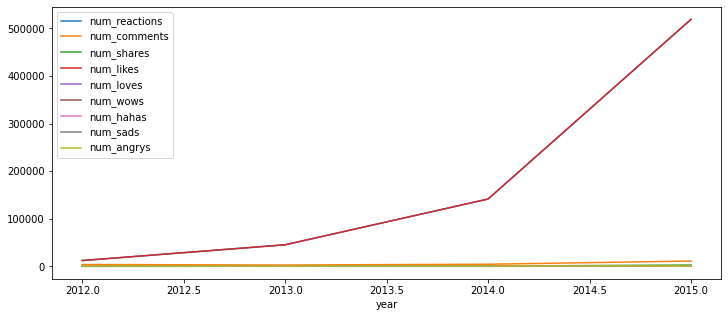

In [72]:
# A lo largo de los años, antes de 2016 y para el contenido de las fotos, las reacciones y los "me gusta" han experimentado un aumento constante.
before2016.groupby('year').sum()[reaction].plot(figsize=(12,5))

In [73]:
before2016.groupby(['year', 'status_type_isvideo']).sum()[reaction]

num_reactions  num_comments  num_shares  num_likes  \
year status_type_isvideo                                                       
2012 0                            12389          4053         110      12389   
2013 0                            23086          2070         207      23086   
     1                            22438           948         306      22438   
2014 0                             3517            91          28       3517   
     1                           138114          4532         813     138114   
2015 0                           440622         10153        2115     440622   
     1                            78417          1206         821      78417   

                          num_loves  num_wows  num_hahas  num_sads  num_angrys  
year status_type_isvideo                                                        
2012 0                            0         0          0         0           0  
2013 0                            0         0          0         0           0  
     1                            0         0          0         0           0  
2014 0                            0         0          0         0           0  
     1                            0         0          0         0           0  
2015 0                            0         0          0         0           0  
     1                            0         0          0         0           0

<Figure size 432x288 with 0 Axes>

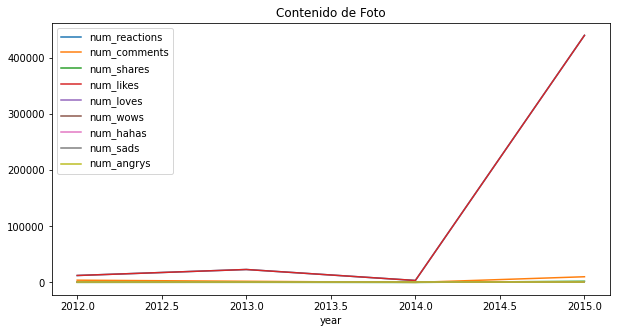

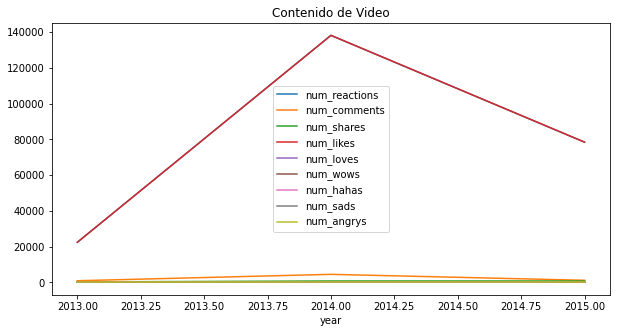

In [97]:
plt.figure(1)
before2016[before2016['status_type_isvideo']==0].groupby('year').sum()[reaction].plot(
    figsize=(10,5), title='Contenido de Foto')

plt.figure(2)
before2016[before2016['status_type_isvideo']==1].groupby('year').sum()[reaction].plot(
    figsize=(10,5), title='Contenido de Video')

<Figure size 432x288 with 0 Axes>

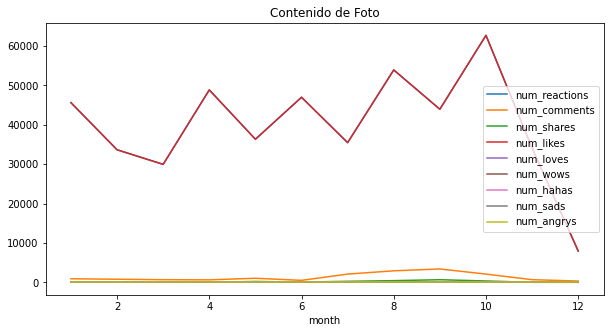

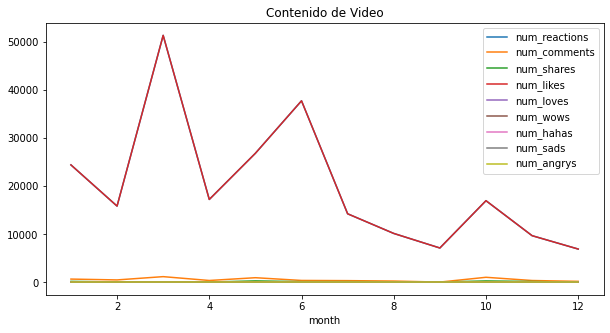

In [98]:
# Los Me gusta y las reacciones aumentaron para el contenido fotográfico de 2014 a 2015. Y para el contenido de video, fueron altos en el año de 2014.
plt.figure(1)
before2016[before2016['status_type_isvideo']==0].groupby('month').sum()[reaction].plot(
    figsize=(10,5), title='Contenido de Foto')

plt.figure(2)
before2016[before2016['status_type_isvideo']==1].groupby('month').sum()[reaction].plot(
    figsize=(10,5), title='Contenido de Video')

<Figure size 432x288 with 0 Axes>

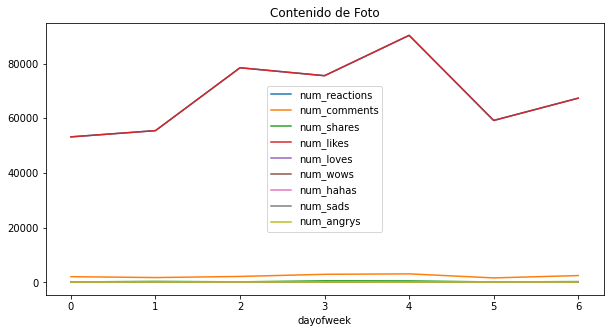

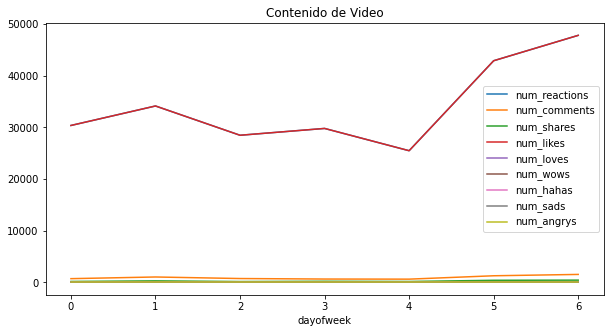

In [99]:
# Tanto para el contenido de fotos como de videos, los me gusta y las reacciones parecen mostrar un patrón ondulado. 
# Aunque la tendencia está disminuyendo para el contenido de video y para las fotos, parece que los inviernos también reciben menos me gusta y reacciones.
plt.figure(1)
before2016[before2016['status_type_isvideo']==0].groupby('dayofweek').sum()[reaction].plot(
    figsize=(10,5), title='Contenido de Foto')

plt.figure(2)
before2016[before2016['status_type_isvideo']==1].groupby('dayofweek').sum()[reaction].plot(
    figsize=(10,5), title='Contenido de Video')

<Figure size 432x288 with 0 Axes>

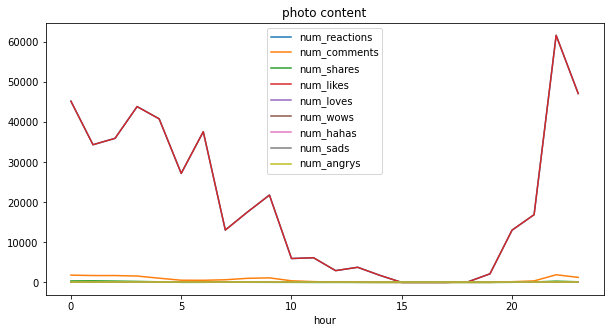

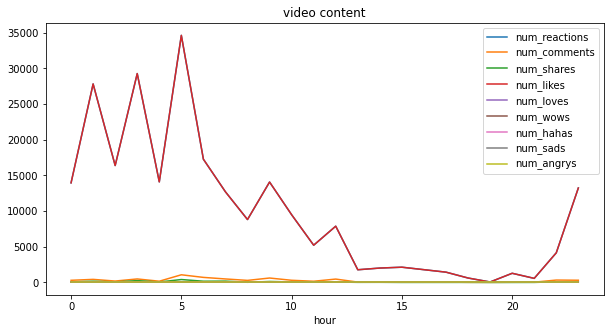

In [77]:
# Los viernes tienen más me gusta para el contenido de fotos. Y, los domingos y sábados tienen más me gusta para el contenido de video.
plt.figure(1)
before2016[before2016['status_type_isvideo']==0].groupby('hour').sum()[reaction].plot(
    figsize=(10,5), title='photo content')

plt.figure(2)
before2016[before2016['status_type_isvideo']==1].groupby('hour').sum()[reaction].plot(
    figsize=(10,5), title='video content')

In [78]:
#Analicemos los datos después de 2016. Intentaremos visualizar los datos mediante PCA.
after2016.groupby('status_type_isvideo')[reaction].mean()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type_isvideo,,,,,,,,,
0,129.56,18.73,2.78,126.26,1.89,0.91,0.25,0.20,0.05
1,212.13,750.17,134.70,164.76,41.67,2.87,2.04,0.49,0.30


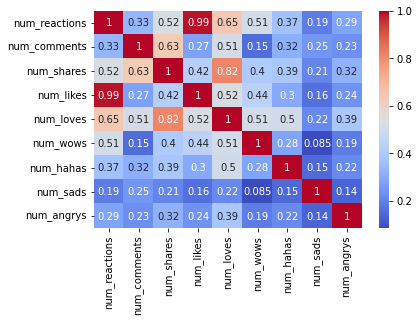

In [79]:
# la reacción (jaja, comentarios, compartidos) es mayor por el contenido del video. Por lo tanto, son más atractivos que las fotos
# las acciones, los comentarios y los amores tienen buena correlación. reacciones, amores, acciones y me gusta también tienen una buena correlación.
sns.heatmap(after2016[reaction].corr(), cmap='coolwarm', annot=True)

In [81]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
after2016_s = after2016[reaction]
after2016_s = standard_scaler.fit_transform(after2016_s)

In [82]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=123)

In [83]:
# Importamos el modulo PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=123)

In [84]:
# Creamos el PCA en los Datos
pca.fit(after2016_s)

PCA(random_state=123, svd_solver='randomized')

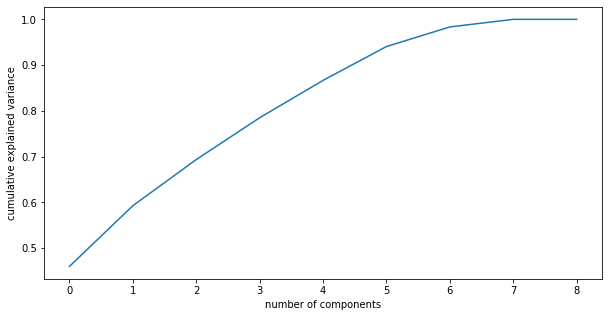

In [85]:
# Hacemos el screeplot - trazando la varianza acumulada contra el número de componentes
fig = plt.figure(figsize = (10,5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [86]:
# ¿Qué porcentaje de variación en los datos puede ser explicado por los primeros 2, 3 y 4 componentes principales respectivamente?
(pca.explained_variance_ratio_[0:2].sum().round(3),
pca.explained_variance_ratio_[0:3].sum().round(3),
pca.explained_variance_ratio_[0:4].sum().round(3))

(0.593, 0.694, 0.785)

In [87]:
# vamos a usar los primeros 2 componentes principales para visualizar la importancia de las características.
loadings = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':reaction})
loadings


,PC1,PC2,Feature
0,0.42,0.40,num_reactions
1,0.30,-0.49,num_comments
2,0.40,-0.27,num_shares
3,0.38,0.47,num_likes
4,0.43,-0.11,num_loves
5,0.30,0.32,num_wows
6,0.28,-0.15,num_hahas
7,0.16,-0.36,num_sads
8,0.23,-0.19,num_angrys


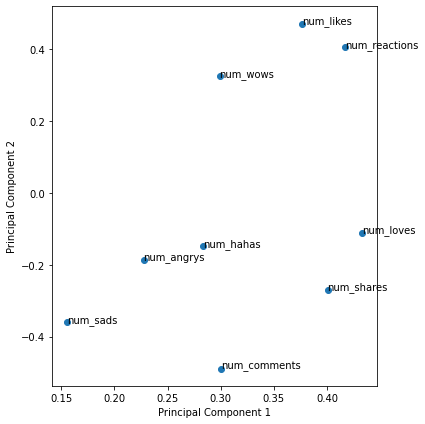

In [88]:
# podemos visualizar lo que los componentes principales parecen capturar.
fig = plt.figure(figsize = (6,6))
plt.scatter(loadings.PC1, loadings.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(loadings.Feature):
    plt.annotate(txt, (loadings.PC1[i],loadings.PC2[i]))
plt.tight_layout()
plt.show()

Los Likes, las reacciones y Wows, son similares e importantes ya que están agrupados y sus cargas son más altas en ambos componentes principales.
Loves, Shares tienen altas cargas en el primer componente principal, junto con los Likes, Reactions.
Hahas, angrys y sads pesan poco en ambos componentes principales.
Como habíamos establecido anteriormente, más shares y comments son los indicadores del contenido del video, por lo que parece 
que el primer componente principal captura el tema del video y el segundo componente principal captura el tema de la foto.

In [90]:
after2016.groupby('year').sum()[reaction]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
year,,,,,,,,,
2016,105220,61065,4105,101501,2803,424,150,329,13
2017,259280,731519,90793,227617,27497,1732,1506,646,263
2018,491654,763002,182472,421716,58948,6613,3229,653,495


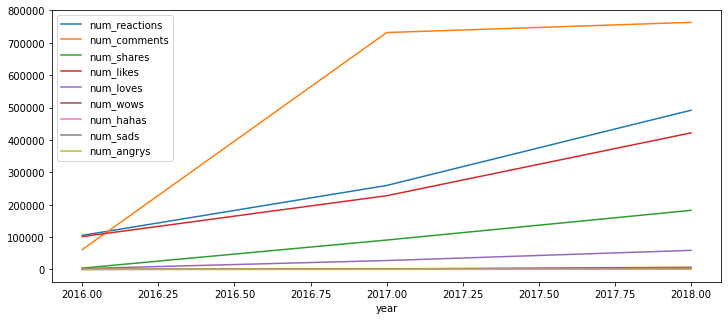

In [91]:
after2016.groupby('year').sum()[reaction].plot(figsize=(12,5))

A lo largo de los años, todas las Reactions han visto un aumento en las Reactions, siendo las más destacadas los comments. Antes de 2016, solía ser Likes y num_reactions.

In [92]:
after2016.groupby(['year', 'status_type_isvideo']).sum()[reaction]

num_reactions  num_comments  num_shares  num_likes  \
year status_type_isvideo                                                       
2016 0                            85825          3508        3159      84077   
     1                            19395         57557         946      17424   
2017 0                           136356         35907        2550     132294   
     1                           122924        695612       88243      95323   
2018 0                           211840         23333        3607     206588   
     1                           279814        739669      178865     215128   

                          num_loves  num_wows  num_hahas  num_sads  num_angrys  
year status_type_isvideo                                                        
2016 0                         1075       315         72       285           1  
     1                         1728       109         78        44          12  
2017 0                         2590       965        219       190          85  
     1                        24907       767       1287       456         178  
2018 0                         2651      1778        544       187          92  
     1                        56297      4835       2685       466         403

<Figure size 432x288 with 0 Axes>

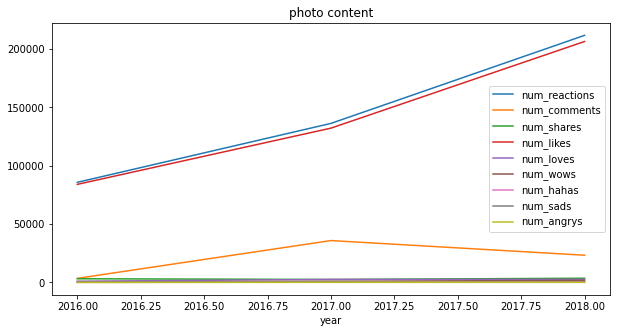

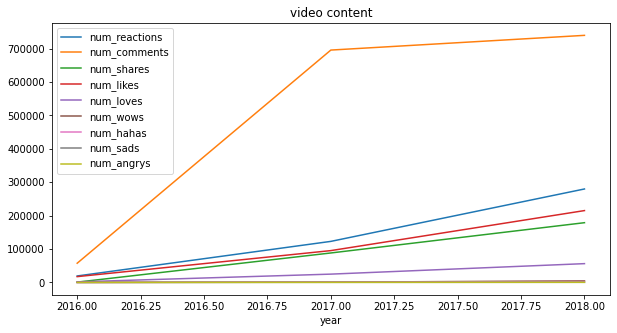

In [93]:
plt.figure(1)
after2016[after2016['status_type_isvideo']==0].groupby('year').sum()[reaction].plot(
    figsize=(10,5), title='photo content')

plt.figure(2)
after2016[after2016['status_type_isvideo']==1].groupby('year').sum()[reaction].plot(
    figsize=(10,5), title='video content')

Esto se puede observar nuevamente, el contenido de fotos tiene más Me gusta, el contenido de video tiene más comentarios y acciones.

<Figure size 432x288 with 0 Axes>

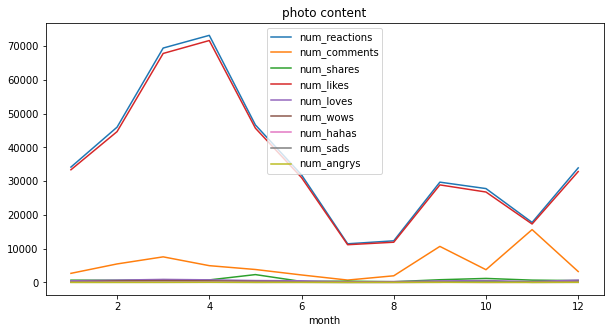

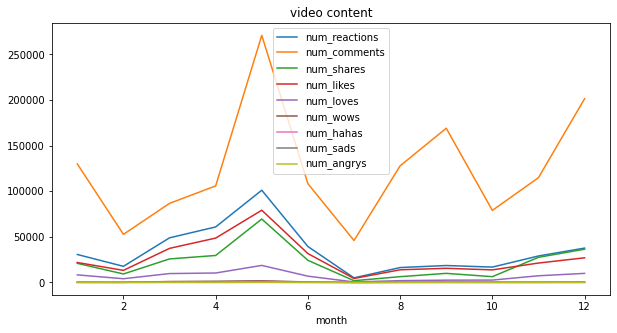

In [94]:
plt.figure(1)
after2016[after2016['status_type_isvideo']==0].groupby('month').sum()[reaction].plot(
    figsize=(10,5), title='photo content')

plt.figure(2)
after2016[after2016['status_type_isvideo']==1].groupby('month').sum()[reaction].plot(
    figsize=(10,5), title='video content')

Los Summers ven el máximo de Likes para el contenido de las fotos. El patrón ondulado que se observó anteriormente para el año anterior a 2016 no está presente aquí. Los likes más bajos son en los meses de julio, septiembre.
Mayo, septiembre y diciembre ven picos en los comments de contenido de video más observados durante un año menos de lo que está presente aquí también

<Figure size 432x288 with 0 Axes>

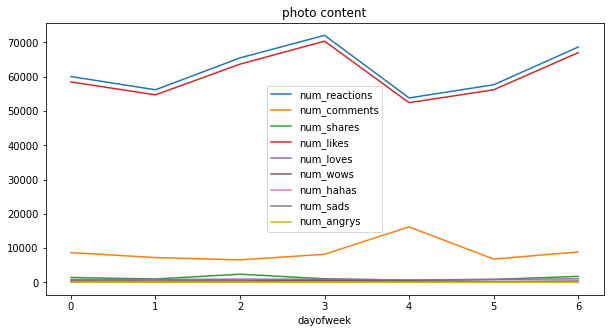

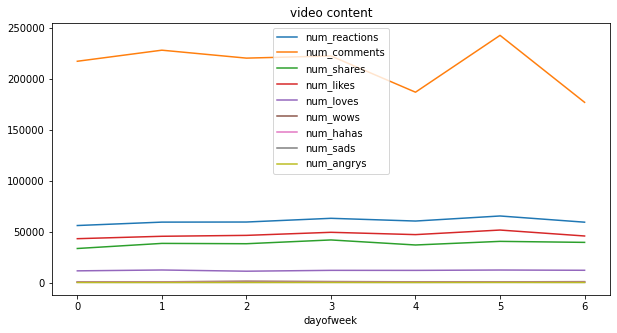

In [95]:
plt.figure(1)
after2016[after2016['status_type_isvideo']==0].groupby('dayofweek').sum()[reaction].plot(
    figsize=(10,5), title='photo content')

plt.figure(2)
after2016[after2016['status_type_isvideo']==1].groupby('dayofweek').sum()[reaction].plot(
    figsize=(10,5), title='video content')

Desde la noche hasta la mañana, de 5 a 8 a.m., los "Likes" son máximos para el contenido de las fotos. Para el contenido de video, la 1 a. m. de la noche y las 8 a. m. de la mañana tienen picos máximos en Shares y Comments. Es justo suponer que es entonces cuando ocurre la venta en vivo.